# Excess Drug consumption Classifier

The problem to be soved in this project is related to drug consumption and the lack of knowdledge in identifying those who are most at risk at devloping excessive drug consumption 
habits for particular drugs. Although some drugs are illegal in many countries, and a lot of money has been spent on both tackling the produiction and tackling of 
said illegal drugs, this has not prevented their widespread usage. Additionally, even legally aquired drugs such as alcohol or nicotin through cigarettes are shown
to be harmful, with the exception of alcohol which is tolerable in more moderate doses. Addicition and misuse of drugs remains a constant battle with no resolution
insight. It costs the NHS and extraordinary amount of money and current very punitive methods to prevent it can backfire and create the opposite intended effect.
Taking the health harms, costs of crime and wider impacts on society together,we estimate the total costs of drugs to society in the UK are over £19 billion, which is more 
than twice the value of the market itself.
	
Through this project, it may be able to help inform of those most at risk for excessive drug consumption. The results of which may be useful for a variety of reasons:
	- Directly find people who are at a higher risk and take more preventative measures when educating them on potential dangers to drugs.
	- For addicts or people who are currently at risk of developing an addiction, if a certain facet of their personality is strong indicator for a given drug, it may easier 
		to appeal to them in one way over another.
	- Parent when raising their childer can understand how their child's personality and habits may or may not create complications through an addictive or 
		bad coping mindset

The data used comes from a culmination of owners particularly: 
-Elaine Fehrman-Men's Personality Disorder and National Women's Directorate,Rampton Hospital, Nottingham
-Vincent Egan, Department of Psychiatry and Applied Psychology, University of Nottingham
-Evgeny M. Mirkes, Department of Mathematics, University of Leicester

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion,
openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence 
and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. 
In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, 
cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which 
was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year,
month, week, or day.
Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", 
"Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

The predictors in this case will be all the attributes besides the classes for the drugs, which will be the labels. To convert this problem into a multi-label classification
problem, the classes will be compressed into a binary class indicating excessive and negligent usage.

A variety of evaluation metrics will be investgated but the hamming loss seems a resonable test for the model.

Determining the impact of the model on some of the stakeholder's KPIs may not be immediate given as the model is better suited to preventing excessive drug usage as opposed to curing it,
but the success can be measured in a marked decrease in the people and costs associated with drugs.

## Data Cleaning

Before building the model it becomes neccessary to verify the cleanliness of the data. First import all the neccessary libraries and check the data.

In [398]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain
from skmultilearn.adapt import MLkNN
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline
from numpy import interp, sqrt
from itertools import cycle
import missingno as msno
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [154]:
pd.set_option('display.max_rows',100)
df=pd.read_csv('C:/Users/Kayse/Project 2/drug_consumption.csv',index_col = 0,header=None)
print(df.columns[0])
df.columns = ['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
print(df.columns)
print(df.describe())
print(df.duplicated().sum())
df
#metrics.plot_roc_curve(model, X_validation, y_validation)

1
Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')
              Age       Gender    Education      Country    Ethnicity  \
count  1885.00000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.03461    -0.000256    -0.003806     0.355542    -0.309577   
std       0.87836     0.482588     0.950078     0.700335     0.166226   
min      -0.95197    -0.482460    -2.435910    -0.570090    -1.107020   
25%      -0.95197    -0.482460    -0.611130    -0.570090    -0.316850   
50%      -0.07854    -0.482460    -0.059210     0.960820    -0.316850   
75%       0.49788     0.482460     0.454680     0.960820    -0.316850   
max       2.59171     0.482460     1.984370     0.

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


In [155]:
ms_lst=[]
lst = []
for i, row in df.iterrows():
    ms_lst.append(i)
for i in range(1,1889):
    if i not in ms_lst:
        lst.append(i)
print(ms_lst)
print(lst)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [156]:
df.reset_index(drop=True,inplace = True)

After sorting out the indexing, the next step is to group the labels into smaller subgroups to help with both the interpretability and performance of the model. I will start with all the recreational illegal drugs that can can be easily abused. They are class A and B drugs in the UK and although some are more explicitly dangerous than others, it makes sense to group them together. The drugs to be grouped in this category are as follows:Amphet,Legalh,Ketamine,Coke,Crack,Ecstasy and Heroin. I have also inclused VSA(volatile substance abuse as it does not fit well with other groups). Once the new aggregate column is created the most frequent usage is taken for each row of that group and all the other columns are dropped.

In [157]:
for i in range(len(df)):
    a = df.loc[i,['Amphet']].values[0]
    b = df.loc[i,['Legalh']].values[0]
    c = df.loc[i,['Ketamine']].values[0]
    d = df.loc[i,['Coke']].values[0]
    e = df.loc[i,['Crack']].values[0]
    f = df.loc[i,['Ecstasy']].values[0]
    g = df.loc[i,['Heroin']].values[0]
    h = df.loc[i,['VSA']].values[0]
    class_list = [a,b,d,e,f,g,h]
    f = lambda x: int(x[2])
    max_list = [f(x) for x in class_list]
    ind = np.argmax(max_list)
    df.loc[i,['ClassA/B']] = class_list[ind]
df = df.drop(columns=['Amphet','Legalh','Ketamine','Coke','Crack','Ecstasy','Heroin','VSA'])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Benzos,Caff,Cannabis,Choc,LSD,Meth,Mushrooms,Nicotine,Semer,ClassA/B
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL2,CL0,CL2
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL6,CL4,CL6,CL2,CL3,CL0,CL4,CL0,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL6,CL3,CL4,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL3,CL5,CL2,CL4,CL0,CL0,CL0,CL2,CL0,CL2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL6,CL3,CL6,CL0,CL0,CL2,CL2,CL0,CL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL4,CL5,CL4,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL0,CL5,CL3,CL4,CL5,CL4,CL4,CL5,CL0,CL3
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL5,CL6,CL6,CL6,CL2,CL0,CL2,CL6,CL0,CL6
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL0,CL6,CL6,CL5,CL3,CL0,CL3,CL4,CL0,CL3


The process is repated with another group, this time psychedelic drugs are the target, including: LSD and Mushrooms

In [158]:
for i in range(len(df)):
    a = df.loc[i,['LSD']].values[0]
    b = df.loc[i,['Mushrooms']].values[0]
    f = lambda x: int(x[2])
    class_list = [a,b]
    max_list = [f(x) for x in class_list]
    ind = np.argmax(max_list)
    df.loc[i,['Psychedelic']] = class_list[ind]
df = df.drop(columns=['LSD','Mushrooms','Choc'])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Alcohol,Amyl,Benzos,Caff,Cannabis,Meth,Nicotine,Semer,ClassA/B,Psychedelic
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL5,CL0,CL2,CL6,CL0,CL0,CL2,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL5,CL2,CL0,CL6,CL4,CL3,CL4,CL0,CL4,CL2
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL6,CL0,CL0,CL6,CL3,CL0,CL0,CL0,CL0,CL1
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL4,CL0,CL3,CL5,CL2,CL0,CL2,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL4,CL1,CL0,CL6,CL3,CL0,CL2,CL0,CL1,CL2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL5,CL0,CL0,CL4,CL5,CL0,CL0,CL0,CL5,CL3
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL5,CL0,CL0,CL5,CL3,CL4,CL5,CL0,CL3,CL5
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL5,CL5,CL6,CL6,CL0,CL6,CL0,CL6,CL2
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL5,CL0,CL0,CL6,CL6,CL0,CL4,CL0,CL3,CL3


Now we group the prescription/legal drugs that people may use and have potential for abuse. These drugs are : Benzos, Amyl and Meth (Methadone).

In [159]:
for i in range(len(df)):
    a = df.loc[i,['Benzos']].values[0]
    b = df.loc[i,['Amyl']].values[0]
    c = df.loc[i,['Meth']].values[0]
    f = lambda x: int(x[2])
    class_list = [a,b,c]
    max_list = [f(x) for x in class_list]
    ind = np.argmax(max_list)
    df.loc[i,['Prescription']] = class_list[ind]
df = df.drop(columns=['Benzos','Amyl','Meth'])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Caff,Cannabis,Nicotine,Semer,ClassA/B,Psychedelic,Prescription
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL6,CL0,CL2,CL0,CL2,CL0,CL2
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL6,CL4,CL4,CL0,CL4,CL2,CL3
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL6,CL3,CL0,CL0,CL0,CL1,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL5,CL2,CL2,CL0,CL2,CL0,CL3
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL6,CL3,CL2,CL0,CL1,CL2,CL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL4,CL5,CL0,CL0,CL5,CL3,CL0
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL5,CL3,CL5,CL0,CL3,CL5,CL4
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL6,CL6,CL0,CL6,CL2,CL5
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL6,CL6,CL4,CL0,CL3,CL3,CL0


The drugs not included in these groupings such as alcohol, cannabis and Nicotine are so ubiquitous that I have decided to test for there usage separately for better interpretability of results. Semeron is a fictional drug used to identify overclaimers. The final step is to convert these labels into binary classes. For the first 2 groupings, anything class 4 and above is considered excessive, whilst for the prescription grouping only class 6 is considered excessive. For alcohol, caffeine and cannabis class 6 is considered excessive, whereas classes 5-6 is excessive for nicotin.

In [160]:
for i in range(len(df)):
    a = df.loc[i,['ClassA/B']].values[0]
    b = df.loc[i,['Psychedelic']].values[0]
    c = df.loc[i,['Prescription']].values[0]
    d = df.loc[i,['Alcohol']].values[0]
    e = df.loc[i,['Caff']].values[0]
    f = df.loc[i,['Cannabis']].values[0]
    g = df.loc[i,['Nicotine']].values[0]
    h = df.loc[i,['Semer']].values[0]
    if int(a[2])>=4:
        df.loc[i,['ClassA/B']] = 1
    else:
        df.loc[i,['ClassA/B']] = 0
    if int(b[2])>=4:
        df.loc[i,['Psychedelic']] = 1
    else:
        df.loc[i,['Psychedelic']] = 0
    if int(c[2])>=6:
        df.loc[i,['Prescription']] = 1
    else:
        df.loc[i,['Prescription']] = 0
    if int(d[2])>=6:
        df.loc[i,['Alcohol']] = 1
    else:
        df.loc[i,['Alcohol']] = 0
    if int(e[2])>=6:
        df.loc[i,['Caff']] = 1
    else:
        df.loc[i,['Caff']] = 0
    if int(f[2])>=6:
        df.loc[i,['Cannabis']] = 1
    else:
        df.loc[i,['Cannabis']] = 0
    if int(g[2])>=5:
        df.loc[i,['Nicotine']] = 1
    else:
        df.loc[i,['Nicotine']] = 0
    if int(h[2])>0:
        df.loc[i,['Semer']] = 1
    else:
        df.loc[i,['Semer']] = 0
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Caff,Cannabis,Nicotine,Semer,ClassA/B,Psychedelic,Prescription
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,1,0,0,0,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,1,0,0,0,1,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,1,0,0,0,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0,0,0,0,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,0,0,0,0,1,0,0
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,0,0,1,0,0,1,0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,1,1,1,0,1,0,0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0,1,1,0,0,0,0,0


Now that the labels are binary, I will do some sanity checks to ensure the data is clean, by checking for missing values. I will also check how many people have claimed to have taken semeron before.

In [241]:
print(pd.unique(df['Semer']))
len(df.loc[df['Semer']==1])

[0 1]


8

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Caff,Cannabis,Nicotine,Semer,ClassA/B,Psychedelic,Prescription
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.0,1885.0,1885.0,1885.0,1885.0,1885.0,1885.0,1885.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1380.0,1385.0,1422.0,1118.0,1877.0,1320.0,1638.0,1737.0
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


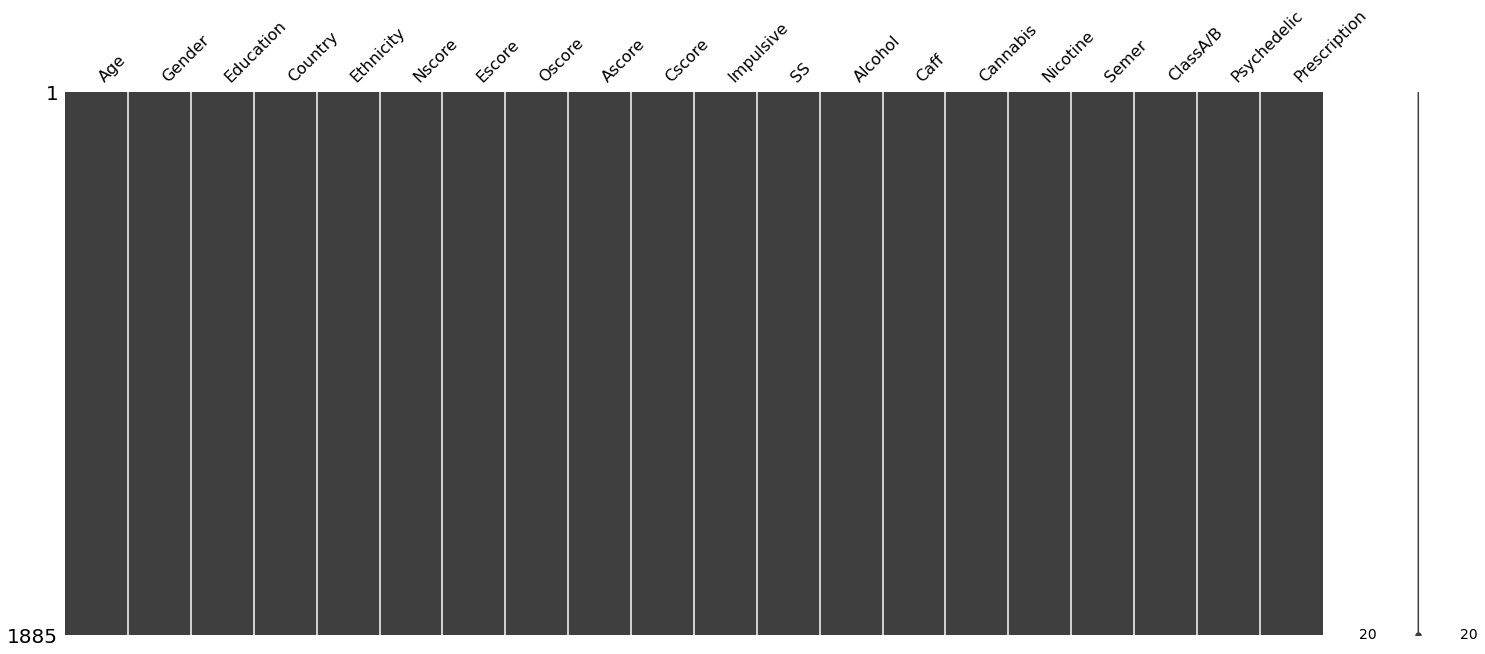

In [171]:
msno.matrix(df)
df.describe(include = 'all')

There are no duplicates and I am satisfied that the data is clean.

# Exploratory data analysis

I already have a good sense for the data and what each column describes, but to further investigate the variables, I will use a correlation heatmap to check for multicollinearity.


In [166]:
px.imshow(df.corr(), title="Correlation heatmap of student dataframe")

Interestingly SS(sensation seeking) and Impulsiveness share some correlation. This is quite intuitive as thrill seekers are more willing to take risks to pursue new and different sensations and Impulsiveness is characterised by an individual acting without forethought, in doing so neglecting potential future risks. 

In [175]:
categorical_data = ['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']
## Create subplots of all of the categorical data

rows = (len(categorical_data) // 2)
cols = 2
subplot_titles = tuple(cat + " vs Alcohol" for cat in categorical_data)
fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)

for i, cat in enumerate(categorical_data):
    row = (i // cols) + 1
    col = (i % cols) + 1
    
    fig.add_trace(go.Violin(
        x=df[cat], y=df["Alcohol"], name=cat, box_visible=True
    ), row=row, col=col)
    
    fig.update_xaxes(patch=dict(type='category', categoryorder='mean ascending'), row=row, col=col)
    
    
fig.update_layout(height=4000)
fig.show()

Based off of these graphs, it would appear as though personality scores and gender may have a stronger predicting power for whether someone drinks an excess amount of alcohol. The only way to verify this relationship and is to try to fit a baseline model to this data to see how it performs. It will also be interesting to note how the other drugs depend on these features. A simpler model also helps with the interpretibiliy of the data. It is worth seeing how logistic regression with one vs rest might perform here.

# Baseline model

## Data splitting

Now it is time to split the data into X features and Y labels, and then further split the data into train, validation and test sets.

In [187]:
X = df[['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']].to_numpy().astype('int')
y = df.drop(columns=['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']).to_numpy().astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test, y_test, test_size=0.5
)
X

array([[ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ..., -1, -1,  0],
       ...,
       [ 0,  0,  0, ..., -1,  0,  0],
       [ 0,  0,  0, ..., -2,  1,  1],
       [ 0,  0,  0, ...,  0,  0,  1]])

Now for the baseline model I will use the OneVsRestClassifier to fit a logistic regression model to predict the labels.
## Fitting the data

In [446]:
clf = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
#clf.predict(X_train)
clf.score(X_train,y_train)

0.20242608036391205

The classifier score is 0.2, which is obviously not an ideal score and makes it seem as if the classifier is worst than a coin flip! In actuality, using the score method as a metric is harsh, given that it counts a prediction only if all the labels in a given sample are correctly predicted. So there may be many correctly labeled predictions but if one of the labels for a sample is not correct it is heavily penalised. This means at least 20% of the sample were correctly labelled completely which is slight more hopeful given that it is a multilabel classifier. 

In [447]:
clf.multilabel_

True

The next step is thus to determine a better metric for analysing the performance of my classifier. One potential method is to plot a roc curve for each of the sub classifers that predict one of the 8 classes. This will allow me to determine the performance against each class individually and by determing the area under the curve will give a better indication of the classifiers performance.

For class 0, Best Threshold=0.260014, G-Mean=0.563
For class 1, Best Threshold=0.725484, G-Mean=0.569
For class 2, Best Threshold=0.245282, G-Mean=0.677
For class 3, Best Threshold=0.418091, G-Mean=0.625
For class 4, Best Threshold=0.020733, G-Mean=0.763
For class 5, Best Threshold=0.304223, G-Mean=0.712
For class 6, Best Threshold=0.143858, G-Mean=0.711
For class 7, Best Threshold=0.076137, G-Mean=0.674


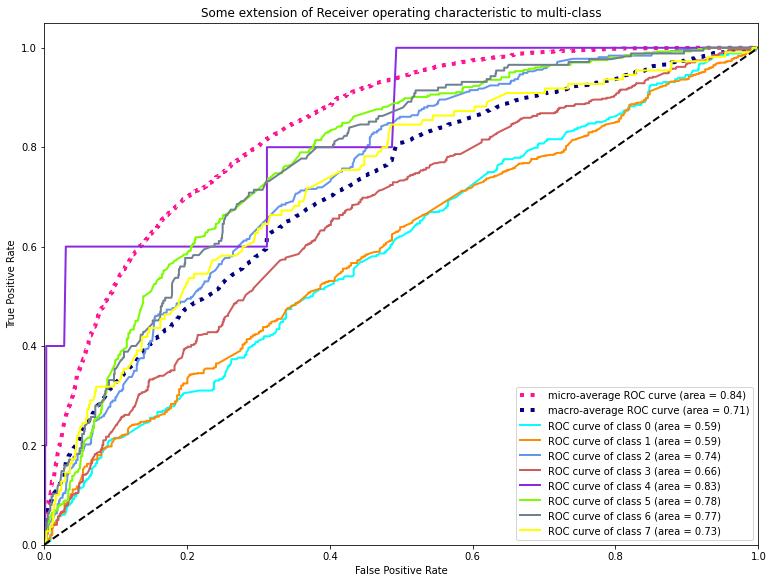

In [454]:
def plot_roc(clf,X,y,n_classes=8):
    n_classes = n_classes
    y_score = clf.predict_proba(X)
    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()
    gmeans = dict()
    ix = dict()
    lw = 2
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y[:, i], y_score[:, i])
        gmeans[i] = sqrt(tpr[i] * (1-fpr[i]))
        ix[i] = np.argmax(gmeans[i])
        print('For class %i, Best Threshold=%f, G-Mean=%.3f' % (i,thresholds[i][int(ix[i])], gmeans[i][int(ix[i])]))
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], thresholds["micro"] = roc_curve(y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=[12.8, 9.6])
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','indianred','blueviolet','lawngreen','slategrey','yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(clf,X_train,y_train)

The results from the roc curves paint a better representatrion of the performance of the one vs rest classifer. Generally the performance is ok but some of the sub classifiers are performing quite badly on their class. The macro-average, which gives equal weight to the classification of each label, is 0.71 meaning the general performance is ok but not exceptional by any means. When repeating these steps for the validation data set

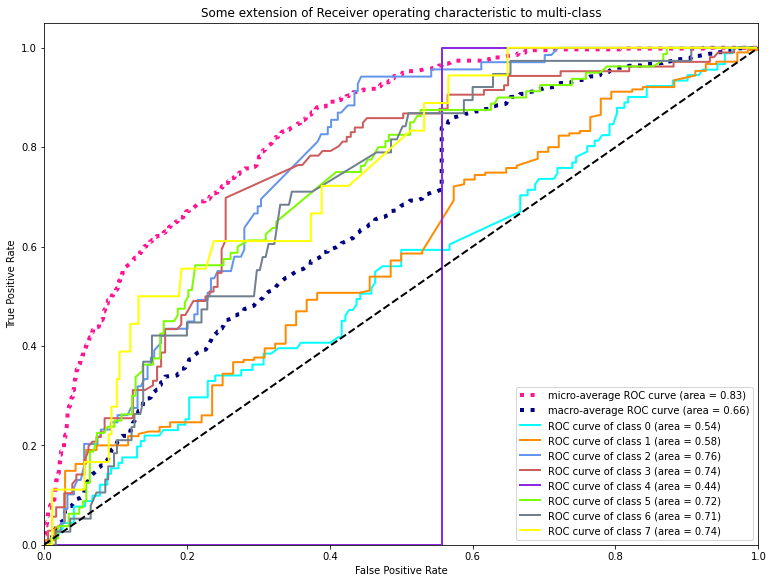

In [449]:
plot_roc(clf,X_validation,y_validation)

As expected the performance decreases slightly on the validation dataset. Though the decrease is not too substantial so there is hardly any overfitting of the data. It is worth noting that the area under the curve for class 4 has gone down substantially. Class 4 represented the made up drug to identify overclaimers in the data. The reason why the performance when labelling for this class is so small is simply because it makes up such a miniscule part of the dataset. It may be worth taking it out of the classifier entirely, without neglecting the data as 8 out of 1885 respondents is miniscule and I hypothesise that these respondents may have mistaken the name semeron for another drug.

# Final Model selection and Optimisation

With a baseline established, it is time to try different methods to maximise the performance and build a good classifier. The first technique I will use is to implement a grid search to change many of the hyperparamters that are fed into the logistic regression model used in the one vs rest classifier.

In [450]:
parameters = {'estimator__penalty':[ 'l2','elasticnet'], 
            'estimator__C':[0.3,0.6,1,3,6,9,12,15,18,30], 
            'estimator__max_iter':[100,500,1000,15000],
            'estimator__l1_ratio':[0,0.5,1,3,9],}
ovr = OneVsRestClassifier(LogisticRegression(solver='saga'))
clf = GridSearchCV(ovr, param_grid=parameters,scoring = 'roc_auc_ovr', cv = 2, refit = 'roc_auc_ovr',return_train_score=True)
clf.fit(X_train, y_train)

penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn

GridSearchCV(cv=2,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(solver='saga')),
             param_grid={'estimator__C': [0.3, 0.6, 1, 3, 6, 9, 12, 15, 18, 30],
                         'estimator__l1_ratio': [0, 0.5, 1, 3, 9],
                         'estimator__max_iter': [100, 500, 1000, 15000],
                         'estimator__penalty': ['l2', 'elasticnet']},
             refit='roc_auc_ovr', return_train_score=True,
             scoring='roc_auc_ovr')

In [451]:
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.scorer_)

0.6849651211067251
OneVsRestClassifier(estimator=LogisticRegression(C=3, l1_ratio=1,
                                                 penalty='elasticnet',
                                                 solver='saga'))
{'estimator__C': 3, 'estimator__l1_ratio': 1, 'estimator__max_iter': 100, 'estimator__penalty': 'elasticnet'}
make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr)


In [349]:
results = pd.DataFrame.from_dict(clf.cv_results_)
#pandas.set_option('display.max_rows', results.shape[0]+1)

In [350]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__C,param_estimator__l1_ratio,param_estimator__max_iter,param_estimator__penalty,param_estimator__max_depth,...,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.055841,0.002123,0.006996,1.192093e-07,"LogisticRegression(C=3, l1_ratio=1, penalty='e...",0.3,0,100,l2,NaN,...,"{'estimator': LogisticRegression(C=3, l1_ratio...",0.704325,0.659999,0.682162,0.022163,215,0.705087,0.745273,0.725180,0.020093
1,0.047971,0.001999,0.007496,5.007982e-04,"LogisticRegression(C=3, l1_ratio=1, penalty='e...",0.3,0,100,elasticnet,NaN,...,"{'estimator': LogisticRegression(C=3, l1_ratio...",0.704325,0.659997,0.682161,0.022164,217,0.705087,0.745271,0.725179,0.020092
2,0.049273,0.000728,0.006996,8.344650e-07,"LogisticRegression(C=3, l1_ratio=1, penalty='e...",0.3,0,500,l2,NaN,...,"{'estimator': LogisticRegression(C=3, l1_ratio...",0.704325,0.659999,0.682162,0.022163,215,0.705087,0.745274,0.725181,0.020093
3,0.045515,0.001197,0.006496,4.999638e-04,"LogisticRegression(C=3, l1_ratio=1, penalty='e...",0.3,0,500,elasticnet,NaN,...,"{'estimator': LogisticRegression(C=3, l1_ratio...",0.704323,0.660003,0.682163,0.022160,210,0.705087,0.745277,0.725182,0.020095
4,0.052828,0.001859,0.006995,8.344650e-07,"LogisticRegression(C=3, l1_ratio=1, penalty='e...",0.3,0,1000,l2,NaN,...,"{'estimator': LogisticRegression(C=3, l1_ratio...",0.704325,0.659997,0.682161,0.022164,217,0.705087,0.745271,0.725179,0.020092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.080441,0.001449,0.001000,2.384186e-07,SVC(),10,NaN,NaN,NaN,NaN,...,"{'estimator': SVC(), 'estimator__C': 10, 'esti...",NaN,NaN,NaN,NaN,342,NaN,NaN,NaN,NaN
424,0.215026,0.014633,0.001000,1.192093e-07,SVC(),100,NaN,NaN,NaN,NaN,...,"{'estimator': SVC(), 'estimator__C': 100, 'est...",NaN,NaN,NaN,NaN,345,NaN,NaN,NaN,NaN
425,0.127438,0.004444,0.000998,1.072884e-06,SVC(),100,NaN,NaN,NaN,NaN,...,"{'estimator': SVC(), 'estimator__C': 100, 'est...",NaN,NaN,NaN,NaN,347,NaN,NaN,NaN,NaN
426,1.025082,0.103919,0.001501,4.997253e-04,SVC(),1000,NaN,NaN,NaN,NaN,...,"{'estimator': SVC(), 'estimator__C': 1000, 'es...",NaN,NaN,NaN,NaN,409,NaN,NaN,NaN,NaN


From using the grid search the performance has increased slightly, but not enough for it to be much of a difference. The hyper parameters chosen for this iteration are{'estimator__C': 3, 'estimator__l1_ratio': 1, 'estimator__max_iter': 100, 'estimator__penalty': 'elasticnet'}. To troubleshoot further, I will implement another grid search but this time, I will also include other estimators such as SVM and decision trees. 

In [343]:
# Just initialize the pipeline with any estimator you like    
pipe = Pipeline(steps=[('estimator',LogisticRegression(solver='saga'))])

# Add a dict of estimator and estimator related parameters in this list
parameters = [{'estimator':[LogisticRegression(solver='saga')],
            'estimator__penalty':[ 'l2','elasticnet'], 
            'estimator__C':[0.3,0.6,1,3,6,9,12,15,18,30], 
            'estimator__max_iter':[100,500,1000,15000],
            'estimator__l1_ratio':[0,0.5,1,3,9],
            },
            {
            'estimator': [DecisionTreeClassifier()],
            'estimator__max_depth': [1,2,3,4,5],
            'estimator__max_features': [None, "auto", "sqrt", "log2"],
            },
            {
            'estimator':[SVC()],
            'estimator__C': [1, 10, 100, 1000],
            'estimator__gamma': [0.001, 0.0001],
            },]
clf = GridSearchCV(OneVsRestClassifier(pipe), param_grid=parameters,scoring = 'roc_auc_ovr', cv = 2, refit = 'roc_auc_ovr',return_train_score=True)
clf.fit(X_train, y_train)

ore
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\metaestimators.py", line 114, in __get__
    getattr(delegate, self.attribute_name)
  File "C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py", line 666, in predict_proba
    self._check_proba()
  File "C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py", line 633, in _check_proba
    raise AttributeError("predict_

GridSearchCV(cv=2,
             estimator=OneVsRestClassifier(estimator=Pipeline(steps=[('estimator',
                                                                      LogisticRegression(solver='saga'))])),
             param_grid=[{'estimator': [LogisticRegression(C=3, l1_ratio=1,
                                                           penalty='elasticnet',
                                                           solver='saga')],
                          'estimator__C': [0.3, 0.6, 1, 3, 6, 9, 12, 15, 18,
                                           30],
                          'estimator__l1_ratio': [0, 0.5, 1, 3, 9],
                          'estimator__max_iter': [100, 500, 1000, 15000],
                          'estimator__penalty': ['l2', 'elasticnet']},
                         {'estimator': [DecisionTreeClassifier()],
                          'estimator__max_depth': [1, 2, 3, 4, 5],
                          'estimator__max_features': [None, 'auto', 'sqrt',
        

In [344]:
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.scorer_)

0.68485677057921
OneVsRestClassifier(estimator=LogisticRegression(C=3, l1_ratio=1,
                                                 penalty='elasticnet',
                                                 solver='saga'))
{'estimator': LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet', solver='saga'), 'estimator__C': 3, 'estimator__l1_ratio': 1, 'estimator__max_iter': 100, 'estimator__penalty': 'elasticnet'}
make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr)


In [348]:
results = pd.DataFrame.from_dict(clf.cv_results_)
pandas.set_option('display.max_rows',50)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__C,param_estimator__l1_ratio,param_estimator__max_iter,param_estimator__penalty,param_estimator__max_depth,...,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.055841,0.002123,0.006996,1.192093e-07,"LogisticRegression(C=3, l1_ratio=1, penalty='e...",0.3,0,100,l2,NaN,...,"{'estimator': LogisticRegression(C=3, l1_ratio...",0.704325,0.659999,0.682162,0.022163,215,0.705087,0.745273,0.725180,0.020093
1,0.047971,0.001999,0.007496,5.007982e-04,"LogisticRegression(C=3, l1_ratio=1, penalty='e...",0.3,0,100,elasticnet,NaN,...,"{'estimator': LogisticRegression(C=3, l1_ratio...",0.704325,0.659997,0.682161,0.022164,217,0.705087,0.745271,0.725179,0.020092
2,0.049273,0.000728,0.006996,8.344650e-07,"LogisticRegression(C=3, l1_ratio=1, penalty='e...",0.3,0,500,l2,NaN,...,"{'estimator': LogisticRegression(C=3, l1_ratio...",0.704325,0.659999,0.682162,0.022163,215,0.705087,0.745274,0.725181,0.020093
3,0.045515,0.001197,0.006496,4.999638e-04,"LogisticRegression(C=3, l1_ratio=1, penalty='e...",0.3,0,500,elasticnet,NaN,...,"{'estimator': LogisticRegression(C=3, l1_ratio...",0.704323,0.660003,0.682163,0.022160,210,0.705087,0.745277,0.725182,0.020095
4,0.052828,0.001859,0.006995,8.344650e-07,"LogisticRegression(C=3, l1_ratio=1, penalty='e...",0.3,0,1000,l2,NaN,...,"{'estimator': LogisticRegression(C=3, l1_ratio...",0.704325,0.659997,0.682161,0.022164,217,0.705087,0.745271,0.725179,0.020092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.080441,0.001449,0.001000,2.384186e-07,SVC(),10,NaN,NaN,NaN,NaN,...,"{'estimator': SVC(), 'estimator__C': 10, 'esti...",NaN,NaN,NaN,NaN,342,NaN,NaN,NaN,NaN
424,0.215026,0.014633,0.001000,1.192093e-07,SVC(),100,NaN,NaN,NaN,NaN,...,"{'estimator': SVC(), 'estimator__C': 100, 'est...",NaN,NaN,NaN,NaN,345,NaN,NaN,NaN,NaN
425,0.127438,0.004444,0.000998,1.072884e-06,SVC(),100,NaN,NaN,NaN,NaN,...,"{'estimator': SVC(), 'estimator__C': 100, 'est...",NaN,NaN,NaN,NaN,347,NaN,NaN,NaN,NaN
426,1.025082,0.103919,0.001501,4.997253e-04,SVC(),1000,NaN,NaN,NaN,NaN,...,"{'estimator': SVC(), 'estimator__C': 1000, 'es...",NaN,NaN,NaN,NaN,409,NaN,NaN,NaN,NaN


In [359]:
# parameters = {'estimators__penalty':[ 'l2','elasticnet'], 
#             'estimators__C':[0.3,0.6,1,3,6,9,12,15,18,30], 
#             'estimators__max_iter':[100,500,1000,15000],
#             'estimators__l1_ratio':[0,0.5,1,3,9],}
# chain = ClassifierChain(LogisticRegression(solver='saga',random_state=0), order='random', random_state=0)
# clf = GridSearchCV(chain, param_grid=parameters,scoring = 'roc_auc_ovr', cv = 2, refit = 'roc_auc_ovr',return_train_score=True)
# clf.fit(X_train, y_train)
chains = [ClassifierChain(LogisticRegression(solver='saga'), order='random', random_state=i)
          for i in range(10)]
for chain in chains:
    chain.fit(X_train, y_train)
Y_pred_chains = np.array([chain.predict(X_train) for chain in
                          chains])
scores = np.array([roc_auc_score(y_train,pred) for pred in Y_pred_chains])

C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means 

In [360]:
scores

array([0.52411838, 0.53223372, 0.52600005, 0.54469579, 0.54461396,
       0.53153278, 0.54569079, 0.5375257 , 0.52618882, 0.53688098])

In [362]:
Y_pred_ensemble = Y_pred_chains.mean(axis=0)
score =roc_auc_score(y_train,Y_pred_ensemble)
score

0.552084213948768

In [367]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [376]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_model.predict(X_train)
score =roc_auc_score(y_train,base_model.predict(X_train))
score

0.9449183576098259

In [385]:
best_random = rf_random.best_estimator_
random_accuracy = roc_auc_score(y_train,best_random.predict(X_train))
random_accuracy

0.8294407647769384

In [386]:

score =roc_auc_score(y_validation,base_model.predict(X_validation))
score

0.5899931439109274

In [387]:
random_accuracy = roc_auc_score(y_validation,best_random.predict(X_validation))
random_accuracy

0.6529772825480541

The model that gave the bestperformance is the one vs rest, logistic regression classifer so this will be used to implement the final model. The final step once selecting the classifer is to select an appropriate threshild. Given that these labels are unbalanced, a default threshold of 0.5 is likely to not be ideal and will probably be much smaller. For this classification problem, false positives are not as impactful as a false negative. Intuitively, it is much worse to diagnose someone as not at risk when they are as opposed to at risk when they are not. This intuition will be useful when considering the results from the Geometric Mean or G-Mean metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

For class 0, Best Threshold=0.260767, G-Mean=0.549
For class 1, Best Threshold=0.736598, G-Mean=0.526
For class 2, Best Threshold=0.181892, G-Mean=0.647
For class 3, Best Threshold=0.437312, G-Mean=0.674
For class 4, Best Threshold=0.002613, G-Mean=0.824
For class 5, Best Threshold=0.313256, G-Mean=0.718
For class 6, Best Threshold=0.130294, G-Mean=0.703
For class 7, Best Threshold=0.086457, G-Mean=0.704


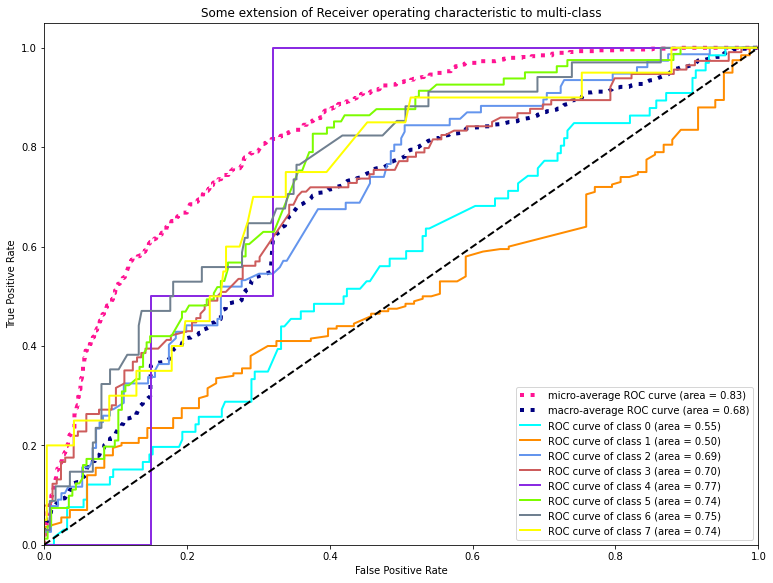

In [455]:
clf = OneVsRestClassifier(LogisticRegression(C=3, l1_ratio=1, penalty='elasticnet', solver='saga')).fit(X_train, y_train)
# plot_roc(clf,X_train,y_train)
# plot_roc(clf,X_validation,y_validation)
plot_roc(clf,X_test,y_test)

In [ ]:
These plots indicate the roc curves of the final classifer on both training,validation and test sets. For each class, the best g-mean score corresponds to a threshold that would be used to make the predictions from a resultant probabilty matrix when make predictions with the classifer.

# Model interpretation

 Now that a final model is selected, this section will cover some interpretation to see what kind of insights the model can provide us about the DataCleaning

C:\Users\Kayse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.

12
Feature: 0, Score: 0.35552
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.42767
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.23191
Feature: 5, Score: 0.17442
Feature: 6, Score: 0.10434
Feature: 7, Score: -0.06616
Feature: 8, Score: -0.10749
Feature: 9, Score: -0.06235
Feature: 10, Score: 0.01701
Feature: 11, Score: 0.13742
Feature: 0, Score: 0.64621
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.21063
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.61239
Feature: 5, Score: 0.13985
Feature: 6, Score: 0.12127
Feature: 7, Score: 0.01540
Feature: 8, Score: -0.11768
Feature: 9, Score: -0.09866
Featu

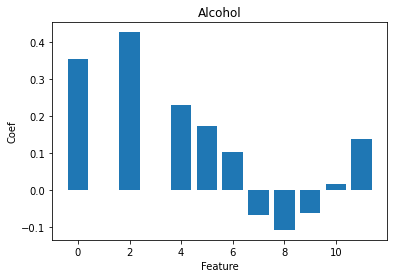

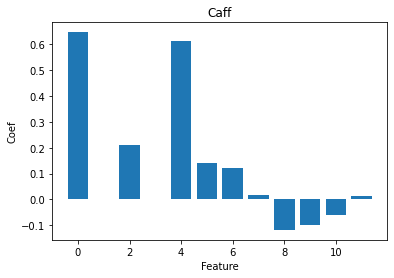

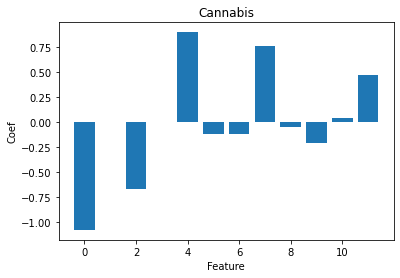

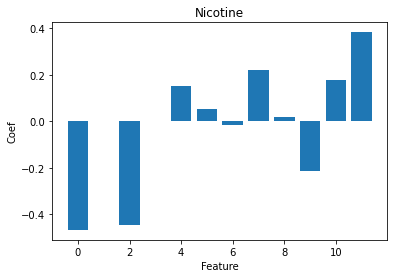

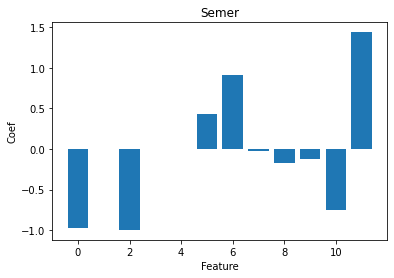

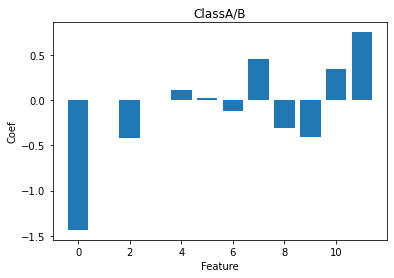

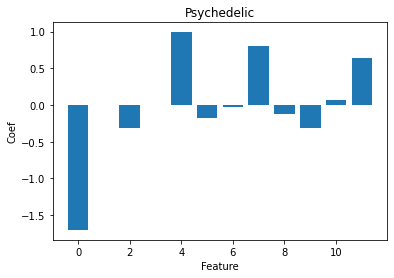

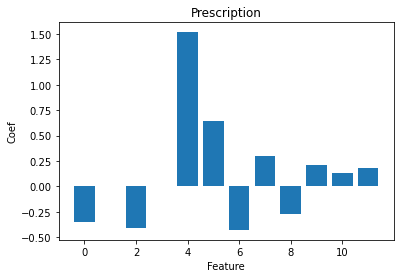

In [441]:
# get importance
importance = clf.coef_
print(len(importance[0]))
# summarize feature importance
for i in range(len(importance)):
    for j,v in enumerate(importance[i]):
        print('Feature: %0d, Score: %.5f' % (j,v))
# plot feature importance
for i in range(len(importance)):
    plt.bar([x for x in range(len(importance[i]))], importance[i])
    plt.xlabel('Feature')
    plt.ylabel('Coef')
    plt.title(df.columns[i+12])
    plt.show()

These plots represent bar charts that indicate the relative size of the coefficients of each of the features. The coeficcients for each of the classes are also presented prior to the bar charts. 

## Final Comments
This model provided some interesting insight into what factors make someone more or less likely to be at risk for excessive drug consumption. In some areas it confirmed my inital hypothesis for certain groups being at greater risk and it broke my expectations in otherways. When stakeholders use this model some considerations should be taken: This model will not with 100% accuracy state that someone who belongs to a risk factor will go on to develop excessive drug consumption. 

Another thing to note is that the groupings made for the drugs will affect the model, meaning a person who takes coke everyday, and a person who takes ecstasy every day are placed under the same umbrella. This seemed logical to me, but there is a chance that very different types of people will engage in one vs the other. As a result some interprability will be lost or gained as a result of the groupings.

Finally, one last caveat is that the dataset has not taken any sort of information relating to the dosage of each individual taking the drug. This means some people may be taking very low doses of a drug generally, not enough to truly be considered excessive but will be labelled as such due to the frequency of usage. For instance, drinking one unit of alcohol a day is not considered excessive by the NHS, but will be deemed so by this model. Whilst it is unlikely this may occur it is not impossible. Additionally, people who take drugs less frequently but in doing so binge, are also likely to escape being labelled as excessive even when it may be.

Besides this use of this model would be relatively simple for stakeholders to use. It requires someone completeing a small survey that asks for age, ethnicity, gender and personality scores and once complete predictions will be available for their risk for any given drug/ drug grouping.#

The survey can be created seperately and once completed all the values are transformed into features that can be used for predictions.
